Idea: Sentiment analysis on product review

In [317]:
"""
Workflow
1) import required libraries
2) load the dataset & understand data
3) Data Manipulation: text preprocessing for tfidf, text preprocessing for word2vec, combining required col
4) ML models: applying tfidf, using logistic regression, naive bayes, Support Vector Classifier
5) DL model: applying word2vec, using logistic regression, Support Vector Classifier
"""

'\nWorkflow\n1) import required libraries\n2) load the dataset & understand data\n3) Data Manipulation: text preprocessing for tfidf, text preprocessing for word2vec, combining required col\n4) ML models: applying tfidf, using logistic regression, naive bayes, Support Vector Classifier\n5) DL model: applying word2vec, using logistic regression, Support Vector Classifier\n'

1) Import required libraries

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('words')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from gensim.models import Word2Vec
import gensim.downloader as api
from scipy.sparse import hstack

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


2) load and understand the dataset

In [301]:
df = pd.read_csv("amazon.csv")
print("these are the features: ", df.keys())
print("this is the shape of the model: ", df.shape)
df.head()

these are the features:  Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
this is the shape of the model:  (1465, 16)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [302]:
df.isnull().sum()
# 

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [303]:
print(df[df['rating'] == '|'])
df.drop(df[df['rating'] == '|'].index, inplace=True)

      product_id                                       product_name  \
1279  B08L12N5H1  Eureka Forbes car Vac 100 Watts Powerful Sucti...   

                                               category discounted_price  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...           ₹2,099   

     actual_price discount_percentage rating rating_count  \
1279       ₹2,499                 16%      |          992   

                                          about_product  \
1279  No Installation is provided for this product|1...   

                                                user_id  \
1279  AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...   

                                              user_name  \
1279  Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...   

                                              review_id  \
1279  R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...   

                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok o

rating
2        1
2.3      1
2.6      1
2.8      2
2.9      1
3        1
3.0      3
3.1      4
3.2      2
3.3     16
3.4     10
3.5     26
3.6     35
3.7     42
3.8     86
3.9    123
4       52
4.0    129
4.1    244
4.2    228
4.3    230
4.4    123
4.5     75
4.6     17
4.7      6
4.8      3
5.0      3
Name: count, dtype: int64


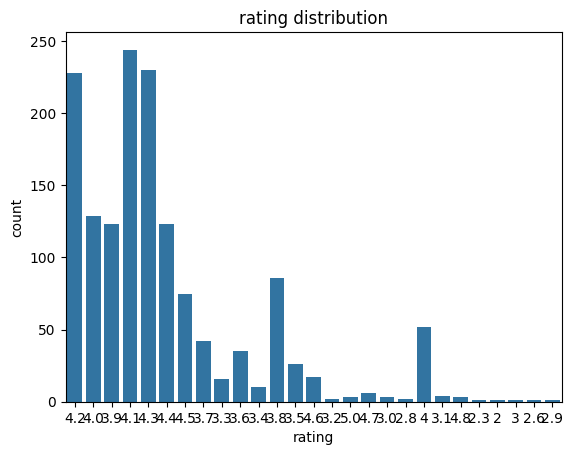

In [304]:
print(df["rating"].value_counts().sort_index())
sns.countplot(x="rating", data=df)
plt.title("rating distribution")
plt.show()

3) Data manipulation

In [305]:
# sentiment labelling
def label_sentiments(rating):
    rating = float(rating)
    if rating > 4.2:
        return "positive"
    elif rating <= 4.2  and rating >= 4:
        return "neutral"
    else:
        return "negitive"

df["sentiment"] = df["rating"].apply(label_sentiments)
print(df["sentiment"].value_counts())

sentiment
neutral     653
positive    457
negitive    354
Name: count, dtype: int64


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1464 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1464 non-null   object
 1   product_name         1464 non-null   object
 2   category             1464 non-null   object
 3   discounted_price     1464 non-null   object
 4   actual_price         1464 non-null   object
 5   discount_percentage  1464 non-null   object
 6   rating               1464 non-null   object
 7   rating_count         1462 non-null   object
 8   about_product        1464 non-null   object
 9   user_id              1464 non-null   object
 10  user_name            1464 non-null   object
 11  review_id            1464 non-null   object
 12  review_title         1464 non-null   object
 13  review_content       1464 non-null   object
 14  img_link             1464 non-null   object
 15  product_link         1464 non-null   object
 16  sentiment  

In [307]:
# text preprocessing for word2vec
texts= df['review_title'] +  ' ' + df['review_content'] + ' ' + df['about_product'] + ' ' +  df['discounted_price'] + ' ' +  df['discount_percentage']  + ' ' + df['rating'] +  ' ' +  df['actual_price'] + ' ' + df['rating_count'] 

stop_words = set(stopwords.words("english"))
english_words = set(words.words())
lemmatizer = WordNetLemmatizer()

def text_preprocess_word2vec(text):
    if type(text) != str:
        text = str(text)
    text = text.lower()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words and word in english_words]
    return lemmatized_tokens

preprocessed_texts = [text_preprocess_word2vec(text) for text in texts]

print(len(preprocessed_texts), len(preprocessed_texts[1]))

1464 154


In [308]:
# text preprocessing for tfidf
def text_preprocess_tfidf(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(word for word in text.split() if word.lower() in english_words)

df["review_content"] = df["review_content"].apply(text_preprocess_tfidf)
df['about_product'] = df['about_product'].apply(text_preprocess_tfidf)
df['review_title'] = df['review_title'].apply(text_preprocess_tfidf)
df['cleaned_data'] = df['review_title'] + ' ' + df['review_content'] + ' ' + df['about_product']

In [309]:
for col in ['discounted_price', 'discount_percentage', 'rating', 'rating_count', 'actual_price']:
    df[col] = df[col].astype(str).str.replace(r'[$₹,%]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce') 

df["rating_count"].fillna(df["rating_count"].median(), inplace=True)  

C:\Users\shiva\AppData\Local\Temp\ipykernel_15820\382236745.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rating_count"].fillna(df["rating_count"].median(), inplace=True)


4) training ML model & text vectorization

In [310]:
X = df['cleaned_data']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numerical_features = df[['discounted_price', 'discount_percentage', 'rating', 'rating_count', 'actual_price']]
num_train, num_test = train_test_split(numerical_features, test_size=0.2, random_state=42)


tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,9), sublinear_tf=True)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

X_train_tfidf = hstack([X_train_tfidf, num_train.values])
X_test_tfidf = hstack([X_test_tfidf, num_test.values])


scaler = MaxAbsScaler()
X_train_tfidf = scaler.fit_transform(X_train_tfidf)
X_test_tfidf = scaler.transform(X_test_tfidf)

print(tfidf.get_feature_names_out()) 

['aa' 'able' 'able to' ... 'your you' 'yourself' 'zero']


In [311]:
# naive bayes
nb_model1 = MultinomialNB()
nb_model1.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model1.predict(X_test_tfidf)

print("The accuracy given by naive bayes is: ", accuracy_score(y_test, y_pred_nb))
print('\n',classification_report(y_test, y_pred_nb))
print('\n', confusion_matrix(y_test, y_pred_nb))

The accuracy given by naive bayes is:  0.5119453924914675

               precision    recall  f1-score   support

    negitive       0.43      0.76      0.55        74
     neutral       0.55      0.38      0.45       124
    positive       0.61      0.49      0.55        95

    accuracy                           0.51       293
   macro avg       0.53      0.54      0.51       293
weighted avg       0.54      0.51      0.51       293


 [[56 14  4]
 [51 47 26]
 [24 24 47]]


In [312]:
# logistic regression
LR_model1 = LogisticRegression(max_iter=100)
LR_model1.fit(X_train_tfidf, y_train)
y_pred_LR = LR_model1.predict(X_test_tfidf)

print("the accuracy score using logistic regression is: ", accuracy_score(y_test, y_pred_LR))
print('\n',classification_report(y_test, y_pred_LR))
print('\n', confusion_matrix(y_test, y_pred_LR))

the accuracy score using logistic regression is:  0.621160409556314

               precision    recall  f1-score   support

    negitive       0.71      0.54      0.62        74
     neutral       0.57      0.74      0.64       124
    positive       0.67      0.53      0.59        95

    accuracy                           0.62       293
   macro avg       0.65      0.60      0.62       293
weighted avg       0.64      0.62      0.62       293


 [[40 28  6]
 [13 92 19]
 [ 3 42 50]]


In [313]:
# support vector classifier
svc_model1 = SVC(kernel='linear')
svc_model1.fit(X_train_tfidf, y_train)
y_pred_svc = svc_model1.predict(X_test_tfidf)

print("the accuracy score using support vector classifier is: ", accuracy_score(y_test, y_pred_svc))
print('\n',classification_report(y_test, y_pred_svc))
print('\n', confusion_matrix(y_test, y_pred_svc))

the accuracy score using support vector classifier is:  0.6484641638225256

               precision    recall  f1-score   support

    negitive       0.67      0.59      0.63        74
     neutral       0.62      0.75      0.68       124
    positive       0.70      0.56      0.62        95

    accuracy                           0.65       293
   macro avg       0.66      0.63      0.64       293
weighted avg       0.66      0.65      0.65       293


 [[44 25  5]
 [13 93 18]
 [ 9 33 53]]


5) Training Word2Vec model

In [314]:
# Train the Word2Vec model
wv_model = Word2Vec(sentences=preprocessed_texts, vector_size=1000, window=5, min_count=1, workers=-1)
wv_model.save("word2vec.model")     # Save the model for later use

def average_word_vectors(text, model):
    words = text_preprocess_word2vec(text)
    vectors = [wv_model.wv[word] for word in words if word in wv_model.wv]
    if not vectors:
        return np.zeros(model.vector_size)  # Return a zero vector if no words are found
    return np.mean(vectors, axis=0)

# Create average word vectors for all texts
average_vectors = np.array([average_word_vectors(text, wv_model) for text in texts])

# Assuming you have a 'label' column in your DataFrame for sentiment
y = df["sentiment"]  # Adjust according to your dataset
X_train, X_test, y_train, y_test = train_test_split(average_vectors, y, test_size=0.2, random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(len(X_test))
print(len(X_train))

293
1171


In [315]:
# logistic regression
LR_model2 = LogisticRegression()
lr_params = {
    'C': [0.1],
    'solver': ['newton-cg'],
    'max_iter': [600]
}

grid_search_lr = GridSearchCV(estimator=LR_model2, param_grid=lr_params, scoring='accuracy', cv=5)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
print("Best parameters for LR:", best_lr)

LR_model2.fit(X_train, y_train)
y_pred_LR = LR_model2.predict(X_test)

print("the accuracy score using logistic regression is: ", accuracy_score(y_test, y_pred_LR))
print('\n',classification_report(y_test, y_pred_LR))
print('\n', confusion_matrix(y_test, y_pred_LR))

Best parameters for LR: LogisticRegression(C=0.1, max_iter=600, solver='newton-cg')
the accuracy score using logistic regression is:  0.5938566552901023

               precision    recall  f1-score   support

    negitive       0.60      0.37      0.46        78
     neutral       0.61      0.74      0.67       137
    positive       0.56      0.56      0.56        78

    accuracy                           0.59       293
   macro avg       0.59      0.56      0.56       293
weighted avg       0.59      0.59      0.58       293


 [[ 29  34  15]
 [ 16 101  20]
 [  3  31  44]]


C:\Users\shiva\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [316]:
# Support Vector Classifier
svc_model2 = SVC()
svc_params = {
    'C': [100, 200, 300, 350, 400],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid_search_svc = GridSearchCV(estimator=svc_model2, param_grid=svc_params, scoring='accuracy', cv=8)
grid_search_svc.fit(X_train, y_train)
print("Best parameters for SVC:", grid_search_svc.best_params_)
best_svc = grid_search_svc.best_estimator_


svc_model2.fit(X_train, y_train)
y_pred_svc = svc_model2.predict(X_test)

print("the accuracy score using support vector classifier is: ", accuracy_score(y_test, y_pred_svc))
print('\n',classification_report(y_test, y_pred_svc))
print('\n', confusion_matrix(y_test, y_pred_svc))

Best parameters for SVC: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
the accuracy score using support vector classifier is:  0.5767918088737202

               precision    recall  f1-score   support

    negitive       0.75      0.12      0.20        78
     neutral       0.53      0.97      0.69       137
    positive       0.87      0.35      0.50        78

    accuracy                           0.58       293
   macro avg       0.72      0.48      0.46       293
weighted avg       0.68      0.58      0.51       293


 [[  9  68   1]
 [  1 133   3]
 [  2  49  27]]
